In [1]:
#import the librraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker
import plotly.express as px

In [9]:
df = pd.read_csv('D:\\backup wiwit\\portofolio data analytics & data science\\Sample Sales Data\\sales_data_sample.csv', encoding='unicode_escape')
df.head(5) #show five datas from the top

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [11]:
df.info() #show data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [12]:
df.shape #show data shape

(2823, 25)

In [13]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE']) #convert ORDERDATE to pandas datetime format
df['ORDERDATE']

In [20]:
df.sort_values(by = ['ORDERDATE'], inplace = True) #sorting data by ORDERDATE

In [22]:
print(df.isnull().sum()) #check if there is any null data or not

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [ ]:
#there are lot of null values in ADDRESSLINE2, STATE, and TERRITORY. Then i will drop it. Values in COUNTRY and CITY
#will be represent the order geographical information

In [27]:
to_drop = ['ADDRESSLINE2','STATE','POSTALCODE','TERRITORY']
df = df.drop(to_drop, axis = 1)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,
2003-01-06,10100,30,100.00,3,5151.00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,Nashua,USA,Young,Valarie,Medium
2003-01-06,10100,50,67.80,2,3390.00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,Nashua,USA,Young,Valarie,Medium
2003-01-06,10100,22,86.51,4,1903.22,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,Nashua,USA,Young,Valarie,Small
2003-01-06,10100,49,34.47,1,1689.03,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,Nashua,USA,Young,Valarie,Small
2003-01-09,10101,45,31.20,3,1404.00,Shipped,1,1,2003,Vintage Cars,33,S24_1937,"Blauer See Auto, Co.",+49 69 66 90 2555,Frankfurt,Germany,Keitel,Roland,Small


In [28]:
df.shape

(2823, 19)

In [29]:
print(df.isnull().sum()) #checking again if there are null values

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


In [30]:
#show the unique value of each column
for c in df.columns:
    print(f'Number of {c} unique values: {df[c].nunique()}')

Number of ORDERNUMBER unique values: 307
Number of QUANTITYORDERED unique values: 58
Number of PRICEEACH unique values: 1016
Number of ORDERLINENUMBER unique values: 18
Number of SALES unique values: 2763
Number of STATUS unique values: 6
Number of QTR_ID unique values: 4
Number of MONTH_ID unique values: 12
Number of YEAR_ID unique values: 3
Number of PRODUCTLINE unique values: 7
Number of MSRP unique values: 80
Number of PRODUCTCODE unique values: 109
Number of CUSTOMERNAME unique values: 92
Number of PHONE unique values: 91
Number of CITY unique values: 73
Number of COUNTRY unique values: 19
Number of CONTACTLASTNAME unique values: 77
Number of CONTACTFIRSTNAME unique values: 72
Number of DEALSIZE unique values: 3


In [31]:
df.describe() # describing the data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [38]:
#Find out 20 Most Valuable Customers
top_customer = df.groupby(['CUSTOMERNAME']).sum().sort_values('SALES', ascending = False).head(20) #sorting the customers as per the sales
top_customer = top_customer[['SALES']].round(3) #round off the sales value up to 3 decimal places
top_customer.reset_index(inplace = True) #reset the index to add the customer name into dataframe
top_customer

,CUSTOMERNAME,SALES
0,Euro Shopping Channel,912294.11
1,Mini Gifts Distributors Ltd.,654858.06
2,"Australian Collectors, Co.",200995.41
3,Muscle Machine Inc,197736.94
4,La Rochelle Gifts,180124.90
5,"Dragon Souveniers, Ltd.",172989.68
6,Land of Toys Inc.,164069.44
7,The Sharp Gifts Warehouse,160010.27
8,"AV Stores, Co.",157807.81
9,"Anna's Decorations, Ltd",153996.13


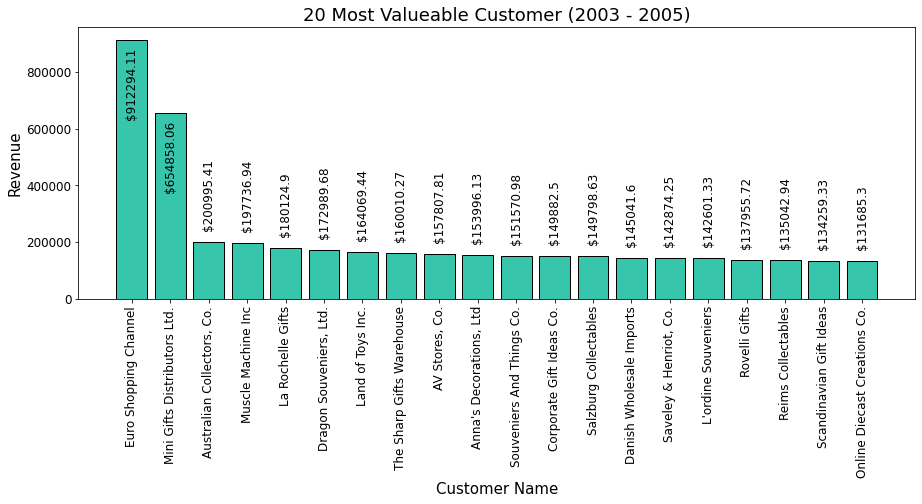

In [46]:
#Figure Find out 20 Most Valuable Customers
plt.figure(figsize = (15,5)) #width and height of figure is defined in inches
plt.title('20 Most Valueable Customer (2003 - 2005)', fontsize = 18)
plt.bar(top_customer['CUSTOMERNAME'], top_customer['SALES'], color = '#37C6AB', edgecolor = 'black', linewidth = 1)
plt.xlabel('Customer Name', fontsize = 15) #x axis shows the customer name
plt.ylabel('Revenue', fontsize = 15) #y axis shows the revenue
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
for k, v in top_customer['SALES'].items(): #to show the exact revenue generated on the figure
    if v > 600000:
        plt.text(k, v-270000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text(k, v+ 50000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')

In [45]:
#Find out 20 Highest Revenue by Country
top_country = df.groupby(['COUNTRY']).sum().sort_values('SALES', ascending = False).head(20) #sort the country as per the sales
top_country = top_country[['SALES']].round(3) #round off teh sales value up to 3 decimal places
top_country.reset_index(inplace = True) #reset the index to add the country into dataframe
top_country

,COUNTRY,SALES
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46
5,Italy,374674.31
6,Finland,329581.91
7,Norway,307463.70
8,Singapore,288488.41
9,Denmark,245637.15


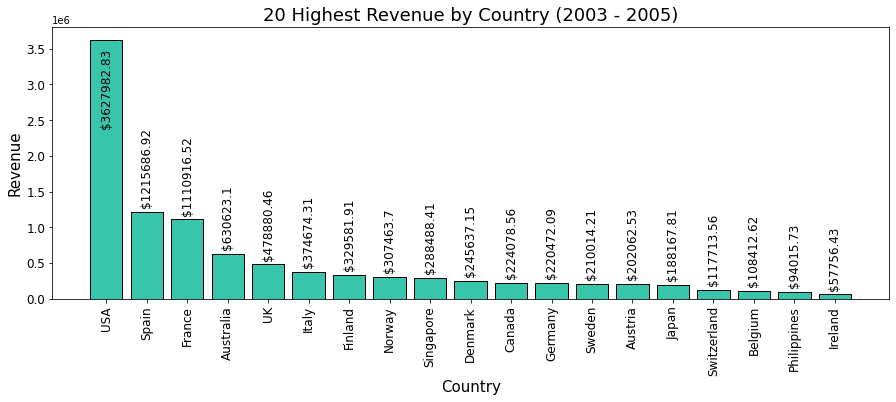

In [47]:
#Figure Find out 20 Highest Revenue by Country
plt.figure(figsize = (15,5)) #width and height of figure is defined in inches
plt.title('20 Highest Revenue by Country (2003 - 2005)', fontsize = 18)
plt.bar(top_country['COUNTRY'], top_country['SALES'], color = '#37C6AB', edgecolor = 'black', linewidth = 1)
plt.xlabel('Country', fontsize = 15) #x axis shows the country
plt.ylabel('Revenue', fontsize = 15) #y axis shows the revenue
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
for k, v in top_country['SALES'].items(): #to show the exact revenue generated on the figure
    if v > 3000000:
        plt.text(k, v-1200000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text(k, v+100000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')

In [48]:
#Find out 20 Highest Revenue by City
top_city = df.groupby(['CITY']).sum().sort_values('SALES', ascending = False).head(20) #sort the country as per the sales
top_city = top_city[['SALES']].round(3) #round off teh sales value up to 3 decimal places
top_city.reset_index(inplace = True) #reset the index to add the country into dataframe
top_city

,CITY,SALES
0,Madrid,1082551.44
1,San Rafael,654858.06
2,NYC,560787.77
3,Singapore,288488.41
4,Paris,268944.68
5,San Francisco,224358.68
6,New Bedford,207874.86
7,Nantes,204304.86
8,Melbourne,200995.41
9,Brickhaven,165255.20


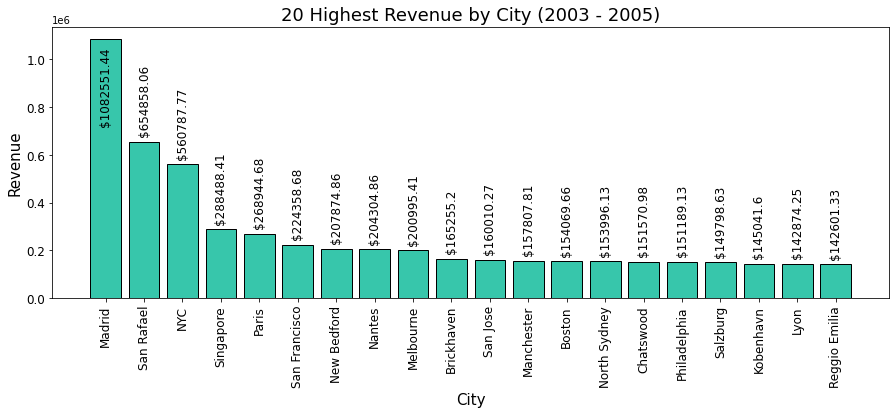

In [49]:
#Figure Find out 20 Highest Revenue by City
plt.figure(figsize = (15,5))
plt.title('20 Highest Revenue by City (2003 - 2005)', fontsize = 18)
plt.bar(top_city['CITY'], top_city['SALES'], color = '#37C6AB', edgecolor = 'black', linewidth = 1 )
plt.xlabel('City', fontsize = 15) #x axis shows the city
plt.ylabel('Revenue', fontsize = 15) #y axis shows the revenue
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
for k, v, in top_city['SALES'].items():
    if v > 800000:
        plt.text(k, v-350000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text(k, v+35000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')


In [50]:
#Which products give the highest revenue
top_product = df.groupby(['PRODUCTLINE']).sum().sort_values('SALES', ascending = False) #sort the categories as per the sales
top_product = top_product[['SALES']] #keep only the sales column in dataframe
top_product.reset_index(inplace = True) #reset index
top_product

,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
1,Vintage Cars,1903150.84
2,Motorcycles,1166388.34
3,Trucks and Buses,1127789.84
4,Planes,975003.57
5,Ships,714437.13
6,Trains,226243.47


In [51]:
total_revenue_product = top_product['SALES'].sum() #find the total revenue generated as per product line
total_revenue_product = str(int(total_revenue_product)) #convert the total revenue from float to int and then to string
total_revenue_product = '$' + total_revenue_product #adding '$' sign before the value

'$10032628'

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000., 4500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

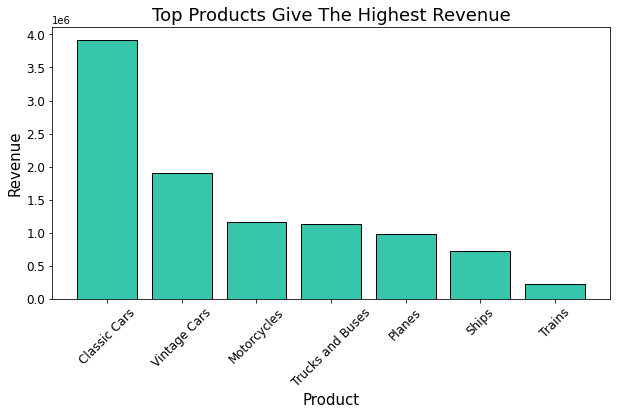

In [54]:
#Figure Top Products Give The Highest Revenue
plt.figure(figsize = (10,5))
plt.title('Top Products Give The Highest Revenue', fontsize = 18)
plt.bar(top_product['PRODUCTLINE'], top_product['SALES'], color = '#37C6AB', edgecolor = 'black', linewidth = 1 )
plt.xlabel('Product', fontsize = 15) #x axis shows the city
plt.ylabel('Revenue', fontsize = 15) #y axis shows the revenue
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)

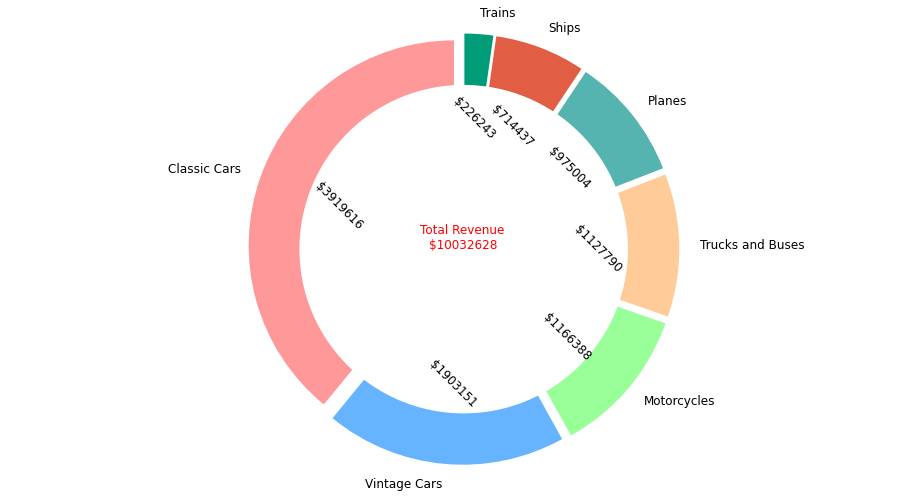

In [55]:
plt.rcParams['figure.figsize'] = (13,7)
plt.rcParams['font.size'] = 12.0 #font size is defined
plt.rcParams['font.weight'] = 6 #font weight is defined
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the product line.
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v = val)
    return my_format
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
pie1 = ax1.pie(top_product['SALES'], colors = colors, labels = top_product['PRODUCTLINE'], autopct = autopct_format(top_product['SALES']), startangle = 90, explode = explode)
fraction_text_list = pie1[2]
for text in fraction_text_list:
    text.set_rotation(315)
center_circle = plt.Circle((0,0), 0.80, fc = 'white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(center_circle)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n' + str(total_revenue_product), color = 'red', xy = (0,0), fontsize = 12, ha  ='center')
plt.tight_layout()
plt.show()

<AxesSubplot:>

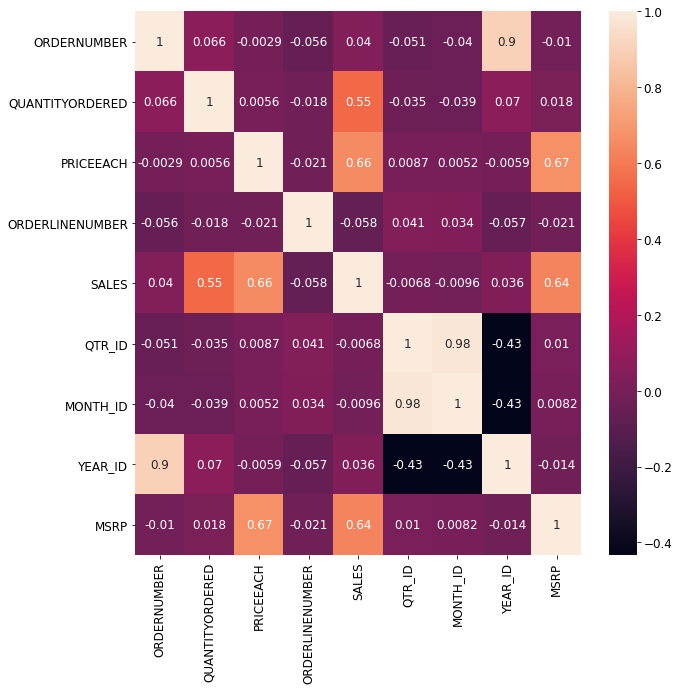

In [56]:
plt.figure(figsize = (10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)

In [61]:
#Find out Top Highest Revenue by Year
top_year = df.groupby(['YEAR_ID']).sum().sort_values('SALES', ascending = False).head(20) #sort the country as per the sales
top_year = top_year[['SALES']].round(3) #round off teh sales value up to 3 decimal places
top_year.reset_index(inplace = True) #reset the index to add the country into dataframe
top_year

,YEAR_ID,SALES
0,2004,4724162.60
1,2003,3516979.54
2,2005,1791486.71


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

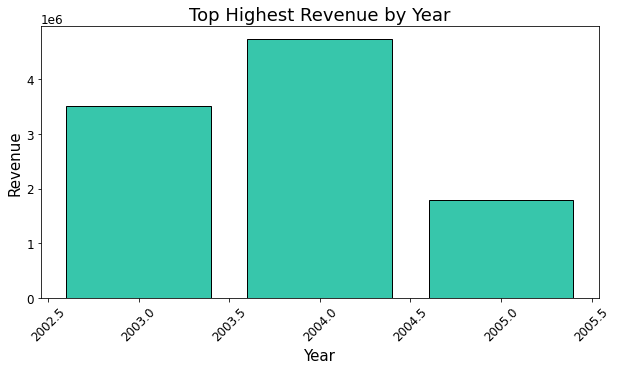

In [62]:
#Figure Top Highest Revenue by Year
plt.figure(figsize = (10,5))
plt.title('Top Highest Revenue by Year', fontsize = 18)
plt.bar(top_year['YEAR_ID'], top_year['SALES'], color = '#37C6AB', edgecolor = 'black', linewidth = 1 )
plt.xlabel('Year', fontsize = 15) #x axis shows the city
plt.ylabel('Revenue', fontsize = 15) #y axis shows the revenue
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)